### Imports

In [2]:
# imports
import pandas as pd
import numpy as np
from numpy import load
from numpy import asarray
from numpy import save
from numpy import mean
from numpy import std

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
sns.set(style='ticks')

In [106]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [7]:
path_images = "images/"

In [8]:
data = pd.read_csv("labels/chords_comp_clean.csv", index_col=0)

In [275]:
data=data.dropna()
data.tail(20)

,id,track_name,time,duration,chord_instructed,chord_played,to_keep,labels
1539,05_SS3-84-Bb_comp_12,05_SS3-84-Bb_comp,34.285714,2.857143,D#:maj,D#:maj/5,True,19
1540,05_SS3-84-Bb_comp_13,05_SS3-84-Bb_comp,37.142857,2.857143,A#:maj,A#:maj/5,True,2
1541,05_SS3-84-Bb_comp_14,05_SS3-84-Bb_comp,40.000000,2.857143,D#:maj,D#:maj/5,True,19
1542,05_SS3-84-Bb_comp_15,05_SS3-84-Bb_comp,42.857143,2.850457,F:maj,F:maj/1,True,33
1543,05_SS3-98-C_comp_0,05_SS3-98-C_comp,0.000000,2.448980,C:maj,C:maj/1,True,16
1544,05_SS3-98-C_comp_1,05_SS3-98-C_comp,2.448980,2.448980,G:maj,G:maj/1,True,40
1545,05_SS3-98-C_comp_2,05_SS3-98-C_comp,4.897959,2.448980,A:min,A:min/1,True,7
1546,05_SS3-98-C_comp_3,05_SS3-98-C_comp,7.346939,2.448980,E:min,E:min/1,True,27
1547,05_SS3-98-C_comp_4,05_SS3-98-C_comp,9.795918,2.448980,F:maj,F:maj(#11)/1,True,33
1548,05_SS3-98-C_comp_5,05_SS3-98-C_comp,12.244898,2.448980,C:maj,C:maj/1,True,16


In [10]:
print(sorted(data.chord_instructed.unique()))

['A#:7', 'A#:hdim7', 'A#:maj', 'A#:min', 'A:7', 'A:hdim7', 'A:maj', 'A:min', 'B:maj', 'B:min', 'C#:7', 'C#:hdim7', 'C#:maj', 'C#:min', 'C:7', 'C:hdim7', 'C:maj', 'C:min', 'D#:7', 'D#:maj', 'D#:min', 'D:7', 'D:maj', 'D:min', 'E:7', 'E:hdim7', 'E:maj', 'E:min', 'F#:7', 'F#:maj', 'F#:min', 'F:7', 'F:hdim7', 'F:maj', 'F:min', 'G#:7', 'G#:hdim7', 'G#:maj', 'G#:min', 'G:hdim7', 'G:maj', 'G:min']


In [27]:
len(data.chord_instructed.unique())

42

In [30]:
data['chord_instructed'].value_counts()

F:maj       122
C:maj        98
G:maj        94
D#:maj       90
C#:maj       79
G#:maj       75
A#:maj       74
F#:maj       73
E:maj        70
D:maj        69
A:maj        67
B:maj        62
E:min        51
G:min        47
C#:min       42
A#:min       38
G#:min       37
A:min        33
B:min        33
D:min        30
F:min        28
D#:7         25
C:min        20
F#:min       19
D#:min       18
F#:7         18
C:7          17
A:7          16
A#:hdim7     14
G:hdim7      14
F:7          12
C#:7         11
F:hdim7       8
A#:7          8
G#:hdim7      8
C:hdim7       7
E:hdim7       6
C#:hdim7      6
E:7           6
G#:7          6
D:7           4
A:hdim7       4
Name: chord_instructed, dtype: int64

In [217]:
# create labels column and encode
le = LabelEncoder()
data['labels'] = le.fit_transform(data['chord_instructed'])

In [176]:
data['labels'].unique()

array([37, 19,  2, 29,  8, 27,  4, 22, 40, 11, 28,  9, 13,  1, 18, 38, 26,
       16,  6, 10, 32,  0, 20, 17, 31, 21, 41, 12, 34, 30, 15,  3, 35, 24,
       36,  7, 33, 14, 25, 23, 39,  5])

In [223]:
# save label encoder
import pickle
filename = 'labelencoder.sav'
pickle.dump(le, open(filename, 'wb'))

In [40]:
data.head(10)

,id,track_name,time,duration,chord_instructed,chord_played,to_keep,labels
0,00_BN1-129-Eb_comp_1,00_BN1-129-Eb_comp,7.441860,3.720930,G#:maj,G#:maj6(*5)/1,True,37
1,00_BN1-129-Eb_comp_2,00_BN1-129-Eb_comp,11.162791,3.720930,D#:maj,D#:maj7/1,True,19
2,00_BN1-129-Eb_comp_3,00_BN1-129-Eb_comp,14.883721,1.860465,A#:maj,A#:maj/1,True,2
3,00_BN1-129-Eb_comp_4,00_BN1-129-Eb_comp,16.744186,1.860465,G#:maj,"G#:maj6(2,b5,*5)/1",True,37
4,00_BN1-129-Eb_comp_5,00_BN1-129-Eb_comp,18.604651,3.719749,D#:maj,D#:maj7/1,True,19
5,00_BN1-147-Gb_comp_0,00_BN1-147-Gb_comp,0.000000,6.530612,F#:maj,F#:maj7/1,True,29
6,00_BN1-147-Gb_comp_1,00_BN1-147-Gb_comp,6.530612,3.265306,B:maj,"B:maj6(b5,*5)/1",True,8
7,00_BN1-147-Gb_comp_2,00_BN1-147-Gb_comp,9.795918,3.265306,F#:maj,F#:maj7/1,True,29
8,00_BN1-147-Gb_comp_4,00_BN1-147-Gb_comp,14.693878,1.632653,B:maj,B:maj7/1,True,8
9,00_BN1-147-Gb_comp_5,00_BN1-147-Gb_comp,16.326531,3.259069,F#:maj,F#:maj7/1,True,29


#### Plot a few images and their labels

F:maj


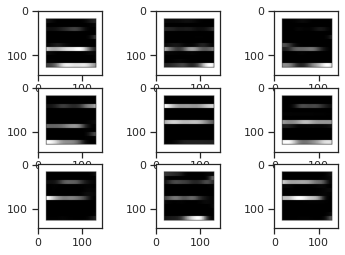

In [14]:
print('F:maj')
F_maj = data[data.chord_instructed == "F:maj"]
for i, name in enumerate(F_maj.id[:9].values):
    plt.subplot(331 + i)
    filename = path_images + name + '.png'
    image = imread(filename)
    plt.imshow(image)

C:maj


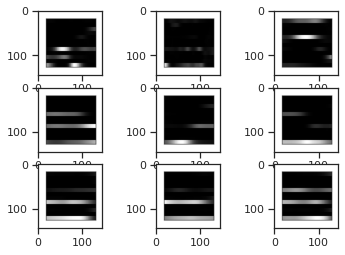

In [15]:
print('C:maj')
C_maj = data[data.chord_instructed == "C:maj"]
for i, name in enumerate(C_maj.id[:9].values):
    plt.subplot(331 + i)
    filename = path_images + name + '.png'
    image = imread(filename)
    plt.imshow(image)

G:maj


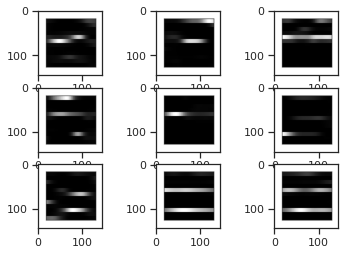

In [16]:
print('G:maj')
G_maj = data[data.chord_instructed == "G:maj"]
for i, name in enumerate(G_maj.id[:9].values):
    plt.subplot(331 + i)
    filename = path_images + name + '.png'
    image = imread(filename)
    plt.imshow(image)

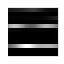

In [17]:
# test format that will be used for modeling
photo = load_img(path_images + name + '.png', color_mode = "grayscale", target_size=(64,64))
photo

#### load dataset for modeling: function `load_data`

In [317]:
photos = list()
for name in data.id.values:
    # load image
    photo = load_img(path_images + name + '.png', color_mode = "grayscale", target_size=(64,64))
     # convert to np array
    photo = img_to_array(photo)
    #store
    photos.append(photo)
labels = list(data['labels'].values)

In [315]:
# convert photos to np arrays
photos = asarray(photos)
photos.shape

(1559, 64, 64, 1)

In [316]:
# convert labels to np arrays
labels = asarray(labels)
labels.shape

(1559,)

In [190]:
# save arrays
save('photos.npy', photos)
save('labels.npy', labels)

In [191]:
# code to load
photos = load('photos.npy')
labels = load('labels.npy')
print(photos.shape, labels.shape)

(1559, 64, 64, 1) (1559,)


In [194]:
# split between training and testing
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, shuffle=False)
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1403, 64, 64, 1), y=(1403,)
Test: X=(156, 64, 64, 1), y=(156,)


In [200]:
# one hot encode target values
print(y_train[:5])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[37 19  2 37 19]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [202]:
len(y_train[0])

42

In [44]:
def load_dataset():
    # load arrays
    photos = load('photos.npy')
    labels = load('labels.npy')
    
    # split between train/test and reshape
    X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, shuffle=False)
    y_train = np.reshape(y_train, (X_train.shape[0],))
    y_test = np.reshape(y_test, (X_test.shape[0],))
    
    # hot encode target variables
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, X_test, y_train, y_test

In [218]:
# trying to get the testing data 'manually' - for the pipeline
# in order to extract audio files from testing data only to try making predictions

test_data = data[['chord_instructed', 'id']][1325:]
labels_test = le.transform(test_data['chord_instructed'])

In [219]:
print(labels_test.shape)
print(labels[1325:].shape)

(234,)
(234,)


In [224]:
print(labels_test[:10])
print(labels[1325:][:10])

[26 26 13 38 26 37 12 37 37 16]
[26 26 13 38 26 37 12 37 37 16]


In [222]:
labels_test == labels[1325:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### prepare pixel data: function `prep_pixels`
Pixel values are from 0 to 255\
We need to rescale to 0,1\
Steps: 
- convert integers to float
- normalize to range 0,1

In [19]:
def prep_pixels(train, test):
    # convert from integers to float - might not need this, they are float already
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    # return normalized images
    return train_norm, test_norm

In [228]:
prep_pixels(X_train, X_test)

(array([[[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         ...,
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]]],
 
 
        [[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
      

In [229]:
# can remove later
X_test.shape

(156, 64, 64, 1)

#### define model: function `define_model`
- Input: convolutional layer with filter size (3,3) and number of filters 32 (this will be the dimensionality of the output space), pooling layer with max 
- Hidden: 100 nodes
- Output: 10 nodes with the probability distribution (using softmax function)
- Activaiton functions: **ReLu**, with He weight initialization scheme
- Loss function: **caregorical cross entropy loss**
- Evaluation metric: **accuracy**
- Gradient descent parameters: learning rate 0.01, momentum 0.9

In [20]:
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu',  kernel_initializer='he_uniform', input_shape=(64, 64, 1))) #conv layer
    model.add(layers.MaxPooling2D((2,2))) #pooling layer
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # hidden layer
    model.add(layers.Dense(42, activation='softmax')) # output
    # compile model
    opt = optimizers.SGD(lr=0.01, momentum=0.9) # gradient descent with momentum optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [188]:
# try running it and display summary
model = define_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3075300   
_________________________________________________________________
dense_3 (Dense)              (None, 42)                4242      
Total params: 3,079,862
Trainable params: 3,079,862
Non-trainable params: 0
_________________________________________________________________
None


#### fit and evaluate model: function `evaluate_model`
By doing a 5 fold cross validation, each test set will be 20% of the set The shuffle parameter is set at true at the beginning so that all models we evaluate end up having the same train and test datasets.
We're setting the number of epochs to 10, with batch size of 32

In [190]:
# try to fit model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.20)

Epoch 1/10
36/36 [==============================] - 1s 38ms/step - loss: 3.4527 - accuracy: 0.0704 - val_loss: 3.5331 - val_accuracy: 0.0747
Epoch 2/10
36/36 [==============================] - 1s 35ms/step - loss: 3.4434 - accuracy: 0.0704 - val_loss: 3.5295 - val_accuracy: 0.0747
Epoch 3/10
36/36 [==============================] - 1s 34ms/step - loss: 3.4366 - accuracy: 0.0704 - val_loss: 3.5268 - val_accuracy: 0.0747
Epoch 4/10
36/36 [==============================] - 2s 47ms/step - loss: 3.4299 - accuracy: 0.0704 - val_loss: 3.5255 - val_accuracy: 0.0747
Epoch 5/10
36/36 [==============================] - 1s 39ms/step - loss: 3.4248 - accuracy: 0.0704 - val_loss: 3.5238 - val_accuracy: 0.0747
Epoch 6/10
36/36 [==============================] - 1s 38ms/step - loss: 3.4198 - accuracy: 0.0704 - val_loss: 3.5227 - val_accuracy: 0.0747
Epoch 7/10
36/36 [==============================] - 1s 39ms/step - loss: 3.4163 - accuracy: 0.0704 - val_loss: 3.5220 - val_accuracy: 0.0747
Epoch 8/10
36

In [192]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc, 'test_loss', test_loss)

5/5 [==============================] - 0s 8ms/step - loss: 3.3312 - accuracy: 0.1410
test_acc: 0.14102564752101898 test_loss 3.331181526184082


In [21]:
# define function to evaluate model
# using validation_data parameter from the fit method

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list() # initializing to keep track
    # prep cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows to train/test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit the model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0) # returns loss value and eval metric, we're only interested in that second one
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

#### present results: functions `summarize_diagnostics` and `summarize_performances`

In [54]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [23]:
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

#### Complete the whole baseline model evaluation

In [24]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    X_train, X_test, y_train, y_test = load_dataset()
    # prepare pixel data
    X_train, X_test = prep_pixels(X_train, X_test)
    # evaluate model
    scores, histories = evaluate_model(X_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 54.093
> 69.751
> 59.075
> 6.071
> 67.143


<ipython-input-51-225bfcd25ea0>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-51-225bfcd25ea0>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


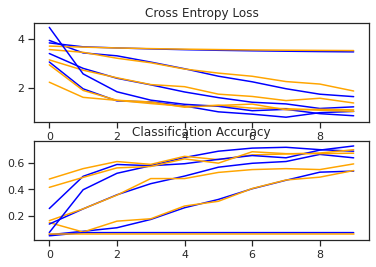

Accuracy: mean=51.226 std=23.261, n=5


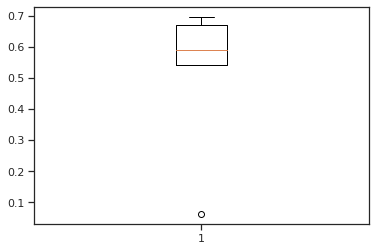

In [52]:
run_test_harness()

#### finalize and make predictions

In [46]:
# fit model on whole data available
# load dataset
X_train, X_test, y_train, y_test = load_dataset()
# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)
model = define_model()
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 2s 36ms/step - loss: 3.9570 - accuracy: 0.1254
Epoch 2/10
44/44 [==============================] - 2s 40ms/step - loss: 2.2752 - accuracy: 0.4811
Epoch 3/10
44/44 [==============================] - 2s 37ms/step - loss: 1.6144 - accuracy: 0.5560
Epoch 4/10
44/44 [==============================] - 2s 38ms/step - loss: 1.3475 - accuracy: 0.6073
Epoch 5/10
44/44 [==============================] - 2s 35ms/step - loss: 1.1932 - accuracy: 0.6222
Epoch 6/10
44/44 [==============================] - 2s 39ms/step - loss: 1.1123 - accuracy: 0.6422
Epoch 7/10
44/44 [==============================] - 2s 38ms/step - loss: 1.0238 - accuracy: 0.6771
Epoch 8/10
44/44 [==============================] - 2s 35ms/step - loss: 0.9301 - accuracy: 0.7163
Epoch 9/10
44/44 [==============================] - 2s 39ms/step - loss: 0.8736 - accuracy: 0.7135
Epoch 10/10
44/44 [==============================] - 2s 36ms/step - loss: 0.7737 - accuracy: 0.7391


In [43]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 58.333


In [36]:
# save model
model.save('final_model.h5')

# Tune model
- For the class imbalance issue: use class weights
- Make two branches: one looking at the root chord, one looking at the ending
- Make a deeper neural network OK
- discarg lines of the dataframe where the performed chords are a bit weird
- add a padding to the Cond2D OK
- increased number of filters (32 to 64) OK

**-----> reached 0.79 mean acuuracy**

In [60]:
# validation split from 10% to 15%
def load_dataset():
    # load arrays
    photos = load('photos.npy')
    labels = load('labels.npy')
    
    # split between train/test and reshape
    X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.15, shuffle=False)
    y_train = np.reshape(y_train, (X_train.shape[0],))
    y_test = np.reshape(y_test, (X_test.shape[0],))
    
    # hot encode target variables
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, X_test, y_train, y_test

# no change
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    # return normalized images
    return train_norm, test_norm

# made a deeper network, add padding, increase number of filters in hidden layers.
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform', input_shape=(64, 64, 1))) #conv layer
    model.add(layers.MaxPooling2D((2,2))) #pooling layer
    model.add(layers.Conv2D(64, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2,2))) #pooling layer
    model.add(layers.Conv2D(64, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform'))              
    model.add(layers.Flatten()) # 16384 vector
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # 1 hidden layer
    model.add(layers.Dense(42, activation='softmax')) # output, size 42 = nuber of classes
    # compile model
    opt = optimizers.SGD(lr=0.01, momentum=0.9) # gradient descent with momentum optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 15 epochs to evaluate
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list() # initializing to keep track
    # prep cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows to train/test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit the model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0) # returns loss value and eval metric, we're only interested in that second one
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# no change
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

# no change
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
    
# no change
def run_test_harness():
    # load dataset
    X_train, X_test, y_train, y_test = load_dataset()
    # prepare pixel data
    X_train, X_test = prep_pixels(X_train, X_test)
    # evaluate model
    scores, histories = evaluate_model(X_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

In [58]:
# try running it and display summary
model = define_model()
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten_29 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 100)             

> 78.113
> 79.245
> 76.604
> 80.755
> 80.377


<ipython-input-60-6862ba41ec46>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-60-6862ba41ec46>:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


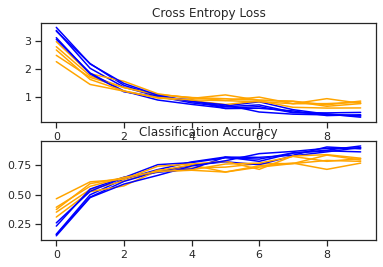

No handles with labels found to put in legend.


Accuracy: mean=79.019 std=1.521, n=5


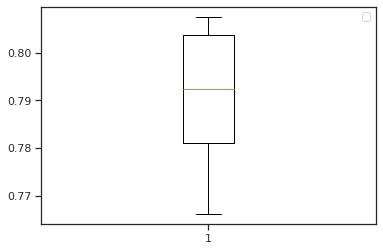

In [61]:
run_test_harness()

In [274]:
# fit model on whole data available - 20 epoch
# load dataset
X_train, X_test, y_train, y_test = load_dataset()
# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)
model = define_model()
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
42/42 [==============================] - 6s 149ms/step - loss: 3.2057 - accuracy: 0.2294
Epoch 2/20
42/42 [==============================] - 5s 128ms/step - loss: 1.6165 - accuracy: 0.5570
Epoch 3/20
42/42 [==============================] - 5s 123ms/step - loss: 1.0763 - accuracy: 0.6626
Epoch 4/20
42/42 [==============================] - 5s 129ms/step - loss: 0.7923 - accuracy: 0.7502
Epoch 5/20
42/42 [==============================] - 5s 124ms/step - loss: 0.6866 - accuracy: 0.7962
Epoch 6/20
42/42 [==============================] - 5s 124ms/step - loss: 0.5300 - accuracy: 0.8423
Epoch 7/20
42/42 [==============================] - 5s 112ms/step - loss: 0.4534 - accuracy: 0.8611
Epoch 8/20
42/42 [==============================] - 5s 118ms/step - loss: 0.3386 - accuracy: 0.8838
Epoch 9/20
42/42 [==============================] - 5s 130ms/step - loss: 0.3194 - accuracy: 0.8898
Epoch 10/20
42/42 [==============================] - 5s 129ms/step - loss: 0.2827 - accuracy: 0.9057

In [276]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 67.521


In [81]:
# save model
model.save('final_model.h5')

#### Get confusion Matrix

In [277]:
X_test.shape

(234, 64, 64, 1)

In [278]:
# predict classes
y_pred = model.predict_classes(X_test)

In [279]:
# get the classes from y test 
y_test_classes = []
for line in y_test:
    val = np.argmax(line)
    y_test_classes.append(val)

In [280]:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test_classes)

In [281]:
for i in range(len(y_pred))[:10]:
    print(f"Label={y_pred_labels[i]}, Predicted={y_pred_labels[i]}")

Label=E:min, Predicted=E:min
Label=E:maj, Predicted=E:maj
Label=C#:min, Predicted=C#:min
Label=C#:min, Predicted=C#:min
Label=F#:min, Predicted=F#:min
Label=C#:min, Predicted=C#:min
Label=C#:min, Predicted=C#:min
Label=G#:maj, Predicted=G#:maj
Label=G#:maj, Predicted=G#:maj
Label=A:min, Predicted=A:min


In [282]:
# print only chords guessed correctly
chords_correct = []
for i in range(len(y_pred)):
    if y_test_labels[i] == y_pred[i]:
        chords_correct.append(y_pred[i])
set(chords_correct)

set()

<AxesSubplot:>

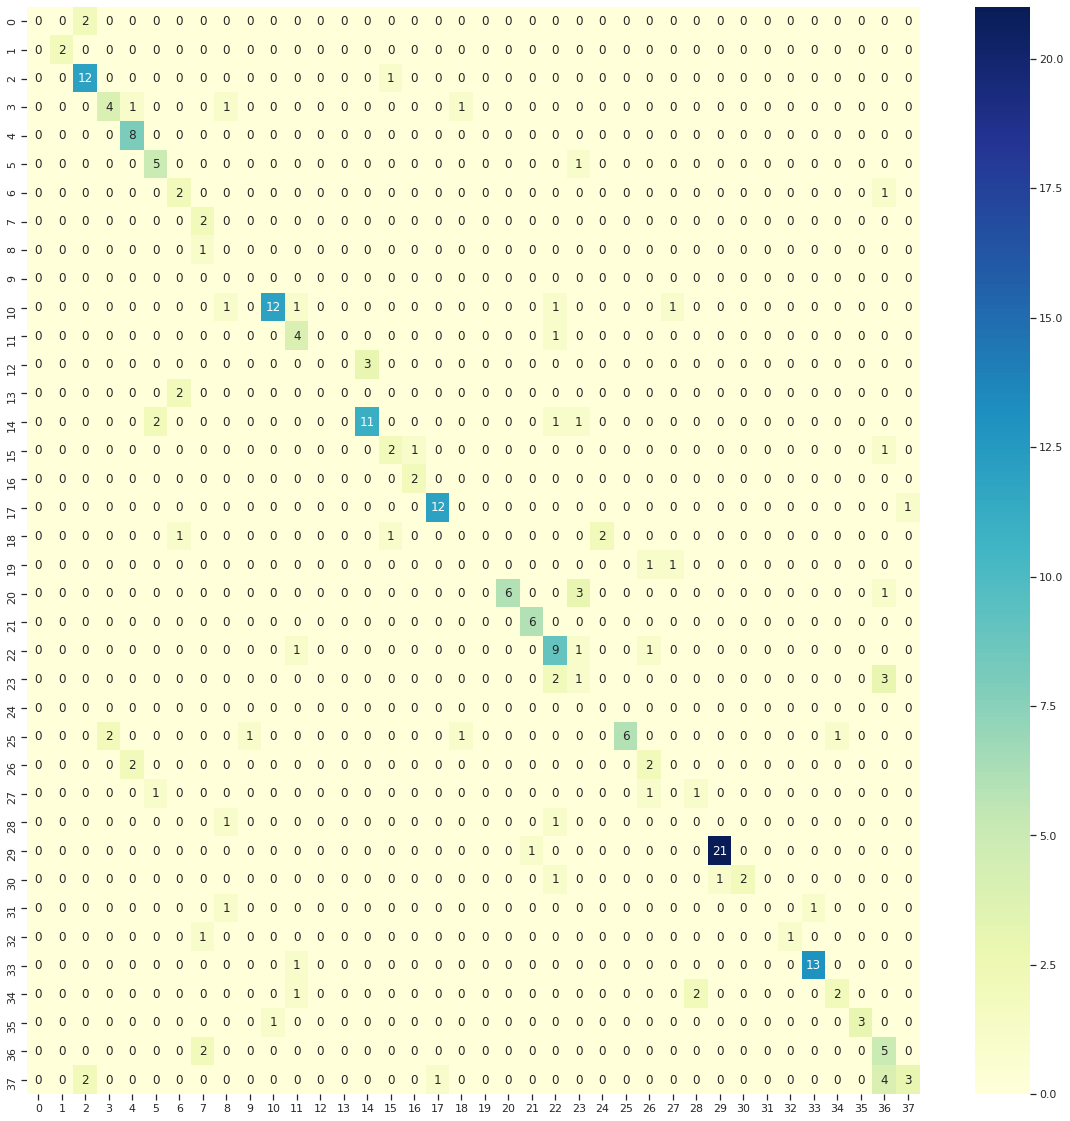

In [283]:
# create confusion matrix with data that has labels
cm = confusion_matrix(y_test_labels, y_pred_labels)

# create heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')

<AxesSubplot:>

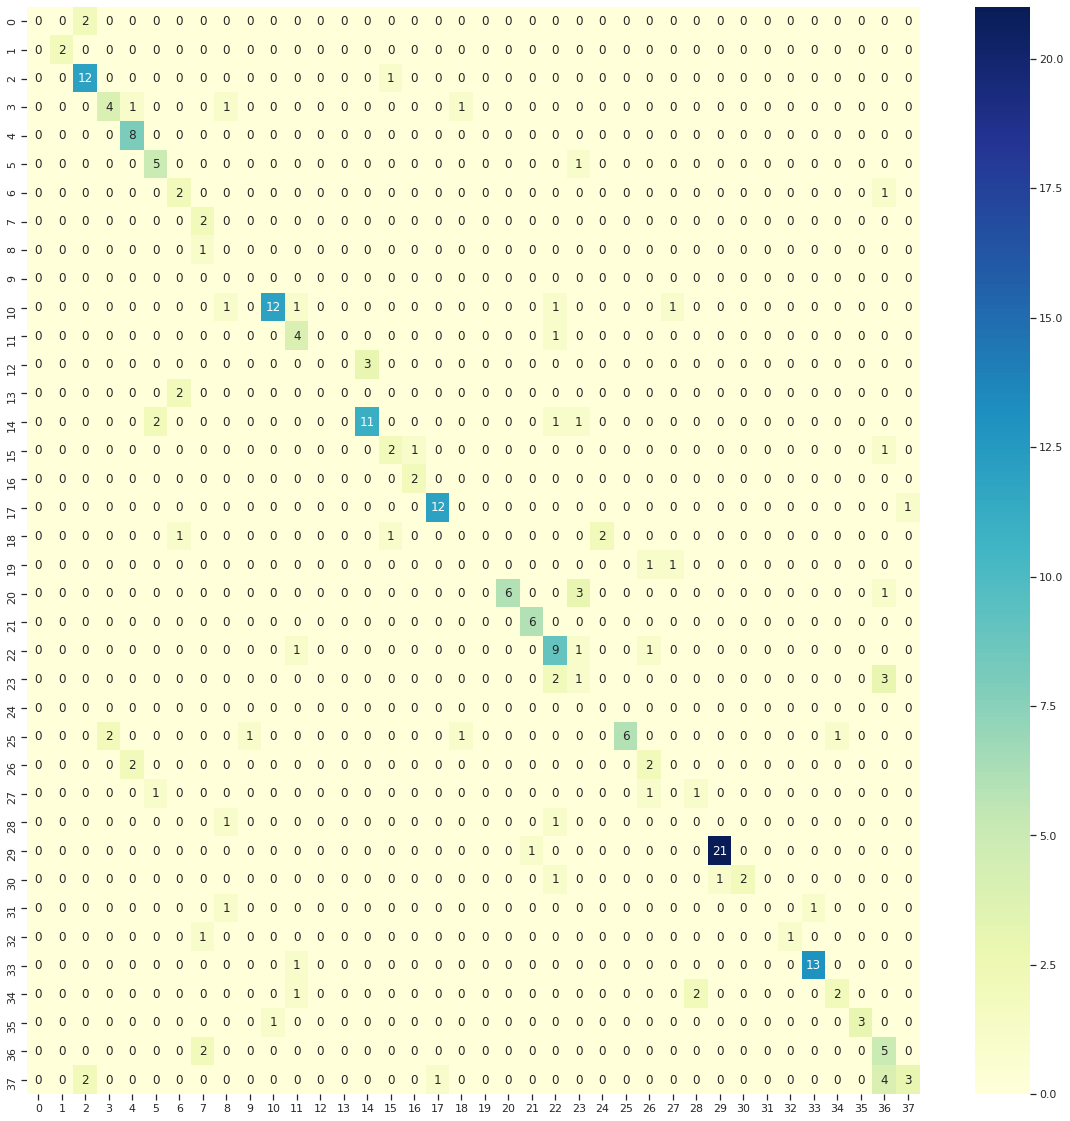

In [295]:
# create confusion matrix with data in number format - same same
cm = confusion_matrix(y_test_classes, y_pred)

# create heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')

In [309]:
# print dictionary mapping from LE
labels = list(le.classes_)
for i, chord in enumerate(labels):
    print(f'{i}  --> {chord}')

0  --> A#:7
1  --> A#:hdim7
2  --> A#:maj
3  --> A#:min
4  --> A:7
5  --> A:hdim7
6  --> A:maj
7  --> A:min
8  --> B:maj
9  --> B:min
10  --> C#:7
11  --> C#:hdim7
12  --> C#:maj
13  --> C#:min
14  --> C:7
15  --> C:hdim7
16  --> C:maj
17  --> C:min
18  --> D#:7
19  --> D#:maj
20  --> D#:min
21  --> D:7
22  --> D:maj
23  --> D:min
24  --> E:7
25  --> E:hdim7
26  --> E:maj
27  --> E:min
28  --> F#:7
29  --> F#:maj
30  --> F#:min
31  --> F:7
32  --> F:hdim7
33  --> F:maj
34  --> F:min
35  --> G#:7
36  --> G#:hdim7
37  --> G#:maj
38  --> G#:min
39  --> G:hdim7
40  --> G:maj
41  --> G:min


I can see that the most present chords in the testing data are: 2, 10, 17, 14, 29, 33, that correspond to A#:maj, C#:7, C:min, C:7, F#:maj, F:maj.
it's consistent from the most frequent chords in the dataset, except for the C7 and Csharp7.

 # Try with Adam optimizer
 Not as good, 0.74 mean accuracy

In [311]:
# validation split from 10% to 15%
def load_dataset():
    # load arrays
    photos = load('photos.npy')
    labels = load('labels.npy')
    
    # split between train/test and reshape
    X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.15, shuffle=False)
    y_train = np.reshape(y_train, (X_train.shape[0],))
    y_test = np.reshape(y_test, (X_test.shape[0],))
    
    # hot encode target variables
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, X_test, y_train, y_test

# no change
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    # return normalized images
    return train_norm, test_norm

# made a deeper network, add padding, increase number of filters in hidden layers.
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform', input_shape=(64, 64, 1))) #conv layer
    model.add(layers.MaxPooling2D((2,2))) #pooling layer
    model.add(layers.Conv2D(64, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2,2))) #pooling layer
    model.add(layers.Conv2D(64, (3,3), activation='relu',  padding='same', kernel_initializer='he_uniform'))              
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform')) # hidden layer
    model.add(layers.Dense(42, activation='softmax')) # output
    # compile model
    opt = optimizers.Adam(lr=0.01) # gradient descent with momentum optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 15 epochs to evaluate
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list() # initializing to keep track
    # prep cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows to train/test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit the model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0) # returns loss value and eval metric, we're only interested in that second one
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# no change
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

# no change
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
    
# no change
def run_test_harness():
    # load dataset
    X_train, X_test, y_train, y_test = load_dataset()
    # prepare pixel data
    X_train, X_test = prep_pixels(X_train, X_test)
    # evaluate model
    scores, histories = evaluate_model(X_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 79.245
> 72.830
> 69.057
> 72.830
> 80.000


<ipython-input-311-c4f65913ef1f>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-311-c4f65913ef1f>:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


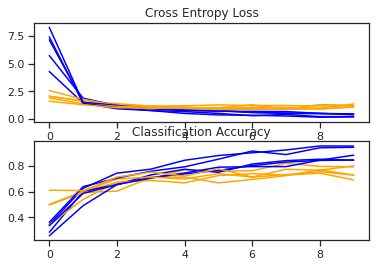

Accuracy: mean=74.792 std=4.184, n=5


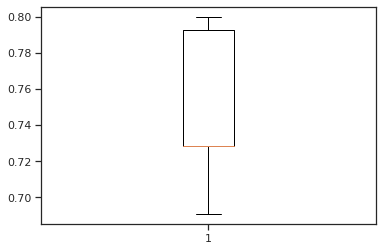

In [312]:
run_test_harness()